In [1]:
!pip install pycaret

     -------------------------------------- 483.6/483.6 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 150.0/150.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB ? eta 0:00:00
     ---------------------------------------- 106.8/106.8 kB ? eta 0:00:00
     -------------------------------------- 81.9/81.9 kB 138.9 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 16.4 MB/s eta 0:00:00
     ------------------------------------- 569.7/569.7 kB 35.0 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 16.1/16.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 46.4/46.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies

In [2]:
!pip install scipy

In [20]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [88]:
df= pd.read_excel("Base_novo_teste.xlsx")

In [89]:
df = df[['qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [90]:
df.head()

,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,Outros_mecanismos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,49,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,257,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


In [91]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [92]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [93]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [94]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [95]:
df = df[np.isfinite(df).all(1)]

In [96]:
# vamos separar duas bases, uma para treino e outra para teste
treino = df.sample(frac=.8, random_state=123)
treino.reset_index(inplace=True, drop=True)


teste = df.drop(treino.index)
teste.reset_index(inplace=True, drop=True)

print(treino.shape, teste.shape)

(4456, 31) (1114, 31)


In [97]:
treino= treino.drop('porte_municipio', axis = 1)
teste = teste.drop('porte_municipio', axis = 1)

## Tratamento

In [98]:
regression_setup = setup(data = treino,target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4456, 30)"
4,Transformed data shape,"(4456, 30)"
5,Transformed train set shape,"(3119, 30)"
6,Transformed test set shape,"(1337, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [99]:
best_model = compare_models(sort = 'MAE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,123.3450,1601476.5796,886.7625,0.9102,0.4050,0.3840,0.1060
et,Extra Trees Regressor,130.6495,1565293.6700,964.0008,0.8955,0.4195,0.4085,0.1140
huber,Huber Regressor,139.9968,337205.6043,559.7105,0.9445,0.7213,0.7337,0.1020
gbr,Gradient Boosting Regressor,141.7777,1666340.2245,1024.0320,0.8795,0.5071,0.5131,0.1000
xgboost,Extreme Gradient Boosting,151.9026,2251894.4291,1162.4642,0.8519,0.5066,0.4287,0.0760
knn,K Neighbors Regressor,163.1706,2239356.2069,1152.3981,0.8552,0.4996,0.4986,0.0860
dt,Decision Tree Regressor,174.7701,1805870.8490,1121.8603,0.8509,0.5696,0.5232,0.0880
br,Bayesian Ridge,182.6063,540398.8280,663.1367,0.9400,1.0636,2.1163,0.0760
en,Elastic Net,183.7372,545752.6114,665.9341,0.9398,1.0800,2.1531,0.0780
omp,Orthogonal Matching Pursuit,183.9632,339521.9721,566.4246,0.9453,1.0505,1.8901,0.0780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [100]:
# verificando os hiperparâmetros do modelo 

print(best_model)

RandomForestRegressor(n_jobs=-1, random_state=42)


In [101]:
rf_regression = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,220.4472,7130529.0709,2670.3051,0.7129,0.3970,0.3645
1,99.4108,259013.3860,508.9336,0.9456,0.4141,0.4025
2,138.0110,443570.4480,666.0108,0.9633,0.3942,0.3696
3,77.9592,100728.5123,317.3776,0.9683,0.3859,0.3638
4,80.8965,73541.4808,271.1853,0.9606,0.4341,0.4197
Mean,123.3450,1601476.5796,886.7625,0.9102,0.4050,0.3840
Std,53.0632,2767677.9406,902.8449,0.0989,0.0172,0.0229


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [102]:
tuned_RF = tune_model(rf_regression,fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,275.1499,7501447.9907,2738.8771,0.6980,0.8813,1.2996
1,181.7892,369329.7590,607.7251,0.9224,1.0540,1.9880
2,193.5946,706315.0942,840.4255,0.9416,0.9791,1.6579
3,151.3685,203793.0760,451.4345,0.9359,0.9746,1.6845
4,143.9324,116185.8625,340.8605,0.9378,1.0281,1.8433
Mean,189.1669,1779414.3565,995.8645,0.8871,0.9834,1.6946
Std,46.7804,2868116.4883,887.5067,0.0948,0.0592,0.2305


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [104]:
#estranho, era para monstrar o que foi testado de diferente com o tuned

print(tuned_RF)

RandomForestRegressor(n_jobs=-1, random_state=42)


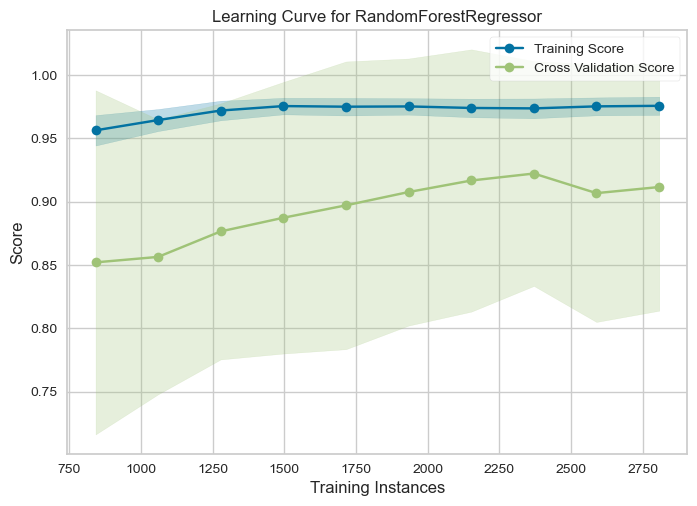

In [108]:
plot_model(tuned_RF, plot = 'learning', use_train_data = True)

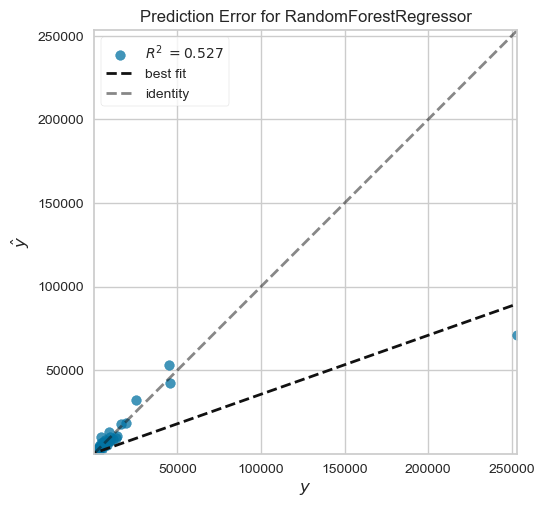

In [109]:
plot_model(tuned_RF, plot='error')

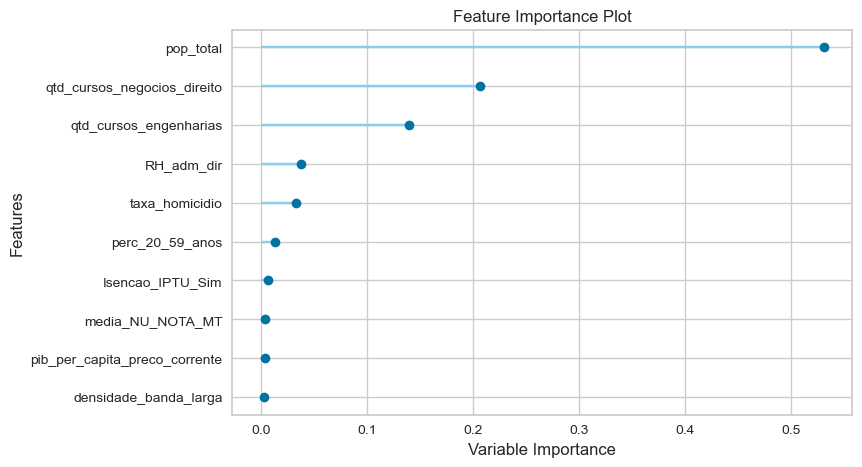

In [110]:
plot_model(tuned_RF, plot='feature')

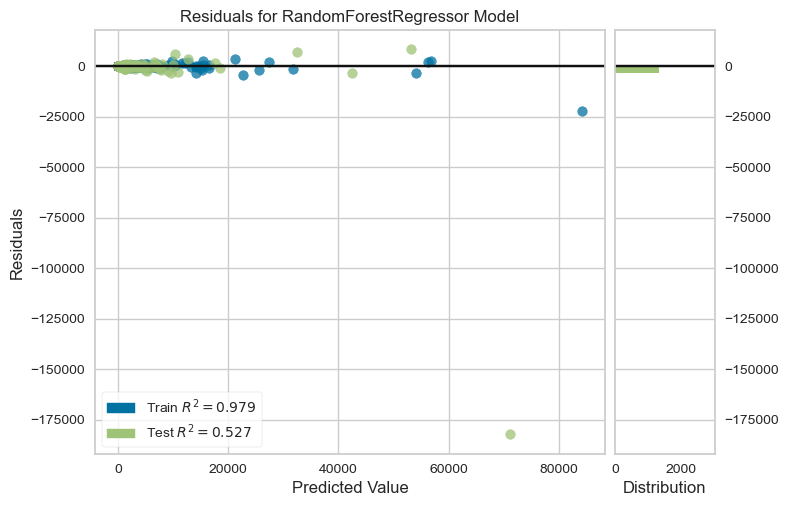

In [112]:
plot_model(tuned_RF, plot='residuals')

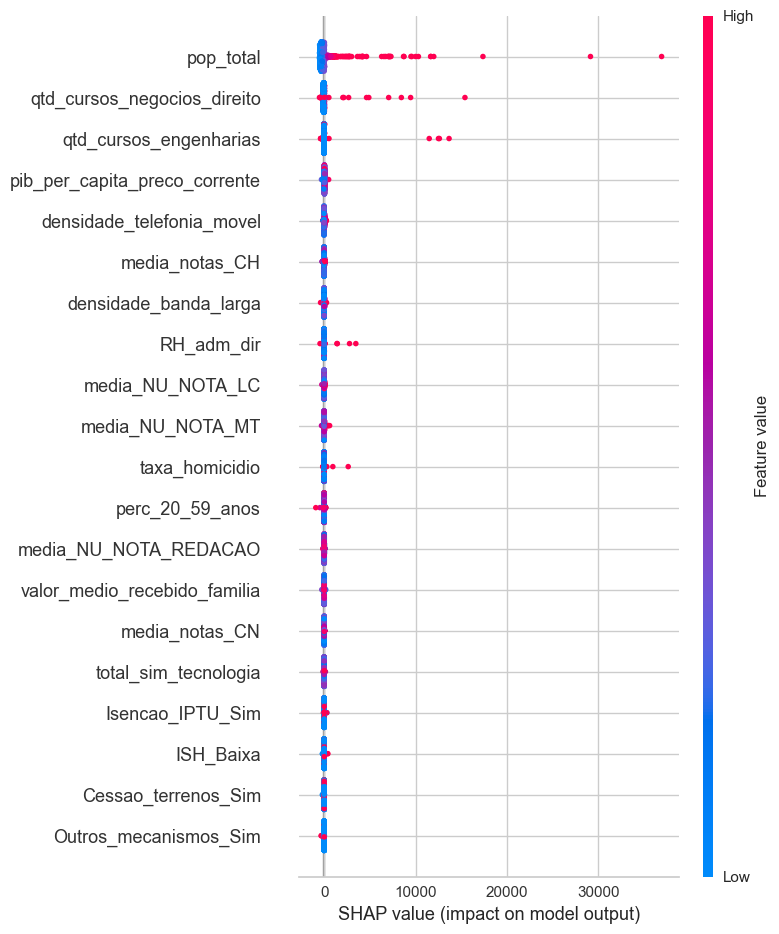

In [111]:
interpret_model(tuned_RF, plot = 'summary')

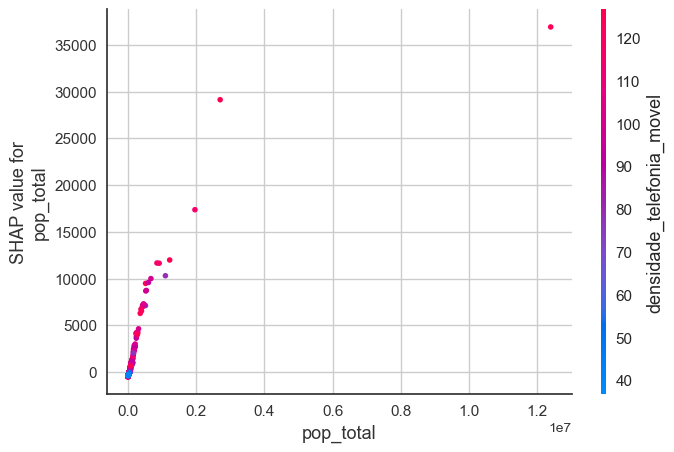

In [116]:
interpret_model(tuned_RF, plot = 'correlation',feature = 'pop_total')

In [117]:
interpret_model(tuned_RF, plot='reason', observation=1)

In [118]:
interpret_model(tuned_RF, plot='reason', observation=3)

In [106]:
pred = predict_model(tuned_RF, data = teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,45.8692,30764.6613,175.3986,0.9944,0.2691,0.2043


In [107]:
pred

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
0,4.0,383.0,1.922125,69.773964,0.0,1.0,475.178558,484.866669,458.886658,518.700012,...,1,0,0,0,0,0,1,0,123,118.98
1,0.0,222.0,31.351351,78.750000,0.0,0.0,465.988220,470.173676,443.521057,472.776459,...,1,1,0,0,0,0,0,0,23,26.45
2,0.0,202.0,28.565121,65.540840,0.0,0.0,462.850006,559.179993,504.799988,519.875000,...,0,1,0,0,0,0,0,0,37,52.86
3,0.0,375.0,18.164360,69.336639,0.0,0.0,461.700012,522.453308,481.893341,473.166656,...,0,0,0,1,0,0,1,0,270,224.12
4,0.0,526.0,16.468121,61.167305,0.0,0.0,488.635712,488.068756,482.718750,506.635712,...,0,0,0,0,0,0,0,0,205,186.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1.0,528.0,6.423907,106.821411,4.0,12.0,449.954041,479.917084,473.014648,516.186462,...,0,0,0,0,0,1,0,0,222,221.34
1110,0.0,394.0,8.442569,104.276825,0.0,0.0,450.285706,464.383331,457.593323,504.085724,...,1,0,1,0,0,0,1,0,66,79.98
1111,0.0,403.0,1.240118,66.485817,0.0,0.0,431.645447,443.024994,426.491669,445.027283,...,0,1,1,0,0,0,0,0,23,44.87
1112,0.0,344.0,7.187342,39.892273,0.0,0.0,432.055542,417.394745,428.821045,460.816681,...,0,1,0,0,0,0,0,0,47,46.75
